<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template
* Notebook completed by Adam Lang as a fundamentals review of PyTorch from the great Daniel Bourke's PyTorch for Deep Learning bootcamp.


## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Fri May  2 17:24:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.6.0+cu124


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

* A few ways to prevent underfitting to increase our models predictive power are:

1. **Add more layers/units to model -- Increase model complexity!**
  * This may give model more opportunity to learn more generalizeable patterns in training data.
  * For example, instead of using 2 hidden layers, use 4 hidden layers in your neural network.

2. **Transfer Learning**
  * Helps to prevent underfitting by leveraging already existing/working patterns from one model/dataset and "transfering" them to another.
  * Example:
    * Train computer vision model on a specific dataset domain and use it on another similar domain.

3. **Train Model for longer**
  * Perhaps initial train schedule did not give model enough time to learn patterns in data.
  * Train model for more EPOCHs may improve accuracy and loss and predictions.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [3]:
# 1. Get data from github
import requests
import zipfile
from pathlib import Path # filepaths

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi" ## small sample

# If image folder doesn't exist download and prepare it
if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data (images from GitHub)
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data....")
  ## write content to file
  f.write(request.content)

## Unzip file
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
  print(f"Unzipping pizza, steak, sushi data to {image_path}")
  zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data to data/pizza_steak_sushi


In [4]:
# 2. Become one with the data -- interact with it (EDA)
import os
## create func to walk through file directories
def walk_through_dir(dir_path):
  """Walks through dir_path, returns file counts of contents."""
  ## loop through files in target directory
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dir_path}")

In [5]:
## run function
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi
There are 0 directories and 78 images in data/pizza_steak_sushi
There are 0 directories and 75 images in data/pizza_steak_sushi
There are 0 directories and 72 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi
There are 0 directories and 25 images in data/pizza_steak_sushi
There are 0 directories and 19 images in data/pizza_steak_sushi
There are 0 directories and 31 images in data/pizza_steak_sushi


In [6]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

## print both
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### Visualize 1 image

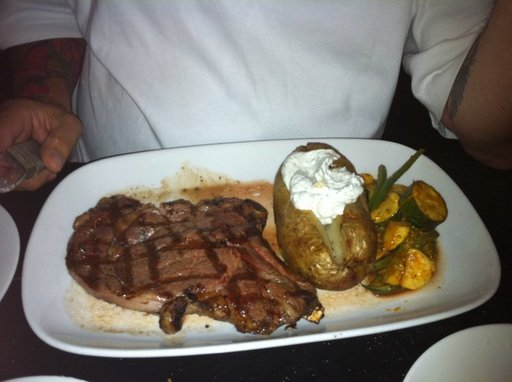

In [7]:
# Visualize an image
from PIL import Image

## open 1 image
Image.open("/content/data/pizza_steak_sushi/train/steak/100135.jpg")


### Visualize Random Image (Random Sample)

[PosixPath('data/pizza_steak_sushi/train/pizza/12301.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/3018077.jpg'), PosixPath('data/pizza_steak_sushi/train/pizza/2885796.jpg')]
data/pizza_steak_sushi/test/steak/3873283.jpg
steak
Random image path: data/pizza_steak_sushi/test/steak/3873283.jpg
Image class: steak
Image height: 512
Image width: 512


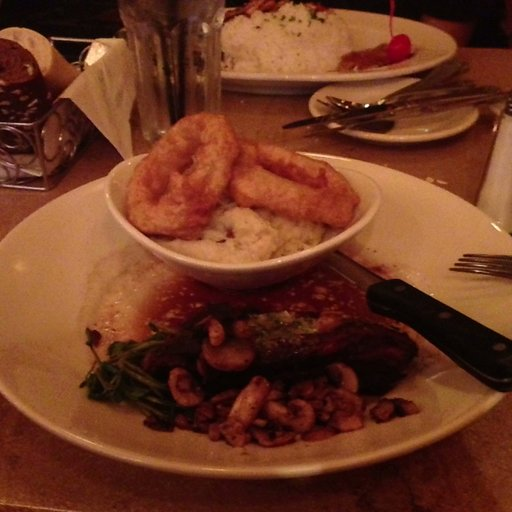

In [8]:
# Visualize a random image (random sample)
import random
from PIL import Image

# set seed
#random.seed(42)

## 1. Get all image paths (* is any combo)
image_path_list = list(image_path.glob("*/*/*.jpg")) # glob is filename end
print(image_path_list[:3])

## 2. Get random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

## 3. Get image class from path name -> parent -> stem
image_class = random_image_path.parent.stem
print(image_class)

## 4. Open image
img = Image.open(random_image_path)

# Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

### Visualize image using Matplotlib

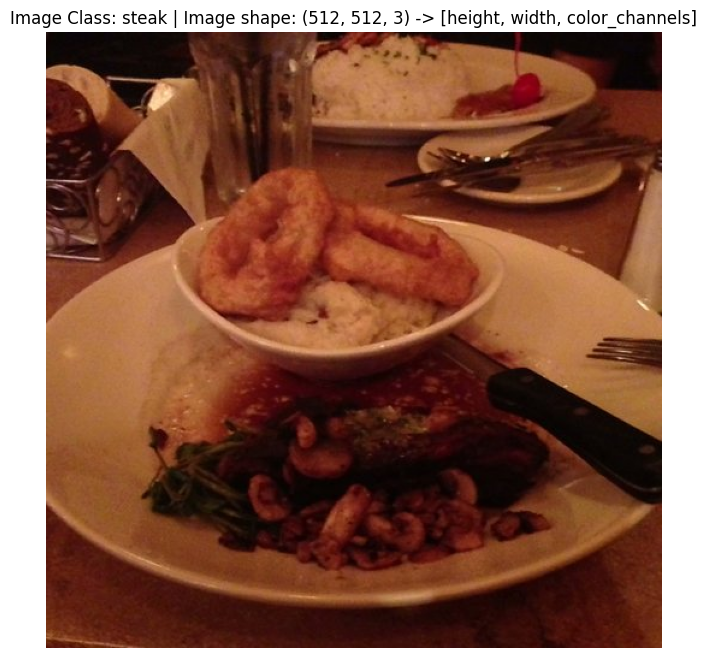

In [9]:
# visualize with Matplotlib (e.g. numpy arrays)
import numpy as np
import matplotlib.pyplot as plt

# Turn image into array
img_as_array = np.asarray(img)

# Plot image
plt.figure(figsize=(12,8))
plt.imshow(img_as_array)
plt.title(f"Image Class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

array([[[ 37,  23,  20],
        [ 30,  16,  13],
        [ 20,   9,   7],
        ...,
        [ 43,   4,   7],
        [ 46,   6,   7],
        [ 49,   7,   9]],

       [[ 35,  21,  18],
        [ 28,  14,  11],
        [ 19,   8,   6],
        ...,
        [ 44,   5,   8],
        [ 47,   7,   8],
        [ 51,   9,  11]],

       [[ 32,  18,  17],
        [ 25,  11,  10],
        [ 17,   6,   4],
        ...,
        [ 46,   7,  10],
        [ 49,   9,  10],
        [ 52,  10,  12]],

       ...,

       [[ 95,  28,  11],
        [ 98,  31,  14],
        [100,  33,  17],
        ...,
        [118,  51,  22],
        [119,  50,  21],
        [118,  49,  20]],

       [[ 83,  16,   0],
        [ 89,  22,   6],
        [ 94,  26,  13],
        ...,
        [120,  50,  24],
        [120,  50,  24],
        [120,  50,  24]],

       [[ 86,  18,   5],
        [ 86,  18,   5],
        [ 86,  18,   7],
        ...,
        [117,  47,  21],
        [122,  52,  26],
        [126,  56,  30]]], dtype=uint8)
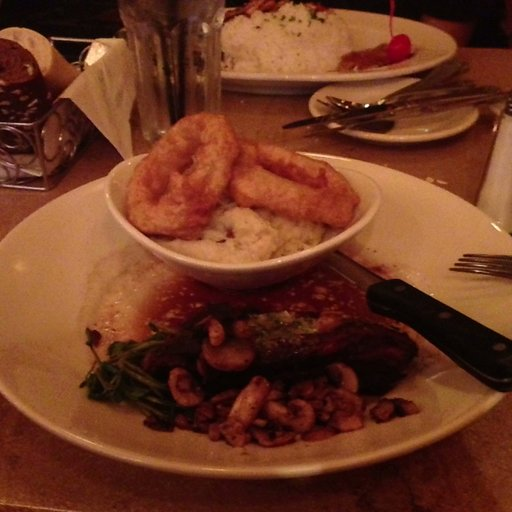

In [10]:
img_as_array

### Data Preprocessing
* We've got some images in our folders.

* Now we need to make them compatible with PyTorch by:
1. Transform the data into **tensors.**
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [11]:
# 3.1 Transforming data with torchvision.transforms -- image transforms
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms ## image augmentation

In [12]:
## 1.Write transform for turning images into tensors
data_transform = transforms.Compose([
                                      # Resize images to 64x64x3 (64 height, 64 width, 3 color channels)
                                      transforms.Resize(size=(64,64)),
                                      # Random horizontal flip of images -- 50% probability of flip
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      # Turn image into torch.Tensor
                                      transforms.ToTensor() # converts all pixel values from 0-255 to between 0 and 1 (e.g. normalized/scaling)

])

In [13]:
random.sample(image_path_list, k=3)

[PosixPath('data/pizza_steak_sushi/test/pizza/540882.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1868005.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/138855.jpg')]

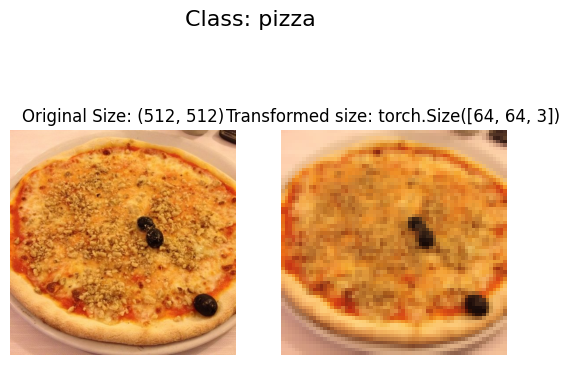

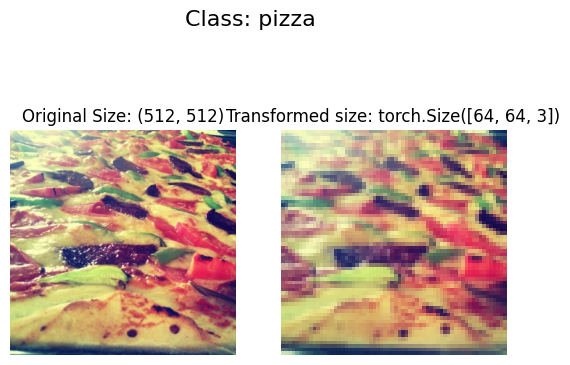

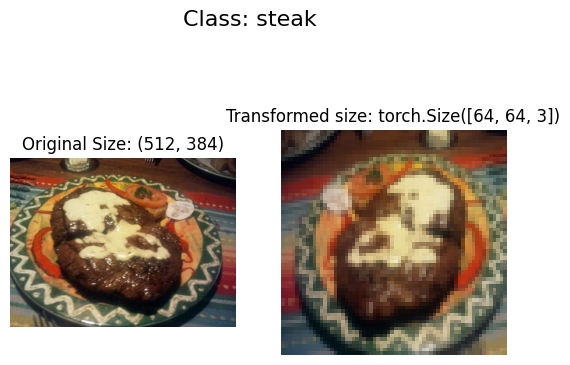

In [14]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """Function plots series of random images from image_paths."""
  random.seed(seed) # set seed
  random_image_paths = random.sample(image_paths, k=n)
  ## loop through each img path
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original Size: {f.size}")
      ax[0].axis("off")

      # Transform and plot image
      # need to permute image to make sure compatible with matplotlib
      transformed_image = transform(f).permute(1, 2, 0) ## rearranges axis dimensions order
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed size: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


## plot transformed images
plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

### Load image data using `ImageFolder`

In [15]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets

## train data
train_data = datasets.ImageFolder(root=train_dir, #target folder of images
                                  transform=data_transform, # image transform/augmentation
                                  target_transform=None) # transforms on labels (if needed)


## test data
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)


## lets see train and test
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [16]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [17]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [18]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

### Turn Datasets ---> DataLoaders
* Note: increasing num of workers may speed up training and gradient descent calculations.

In [19]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader

## train dataloader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=os.cpu_count(),
                              shuffle=True) # only shuffle train set

## test dataloader
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=os.cpu_count(),
                             shuffle=False) ## don't shuffle test data

## lets see test and train dataloaders
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7906228f98d0>,
 <torch.utils.data.dataloader.DataLoader at 0x790622854850>)

In [20]:
## how many batches of image are in dataloaders
len(train_dataloader), len(test_dataloader)

(225, 75)

In [21]:
# How many batches of images are in our data loaders?
img, label = next(iter(train_dataloader))

# Batch size will now be 1, can change batch_size parameter
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


Summary
* 1 batch, 3 color channels, size is 64x64

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [48]:
import torch
from torch import nn

## model class
class TinyVGG(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    ## Conv block 1
    self.conv_block_1 = nn.Sequential(
        ## Layer1
        nn.Conv2d(in_channels=input_shape, ## num color channels
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        ## non-linear layer
        nn.ReLU(),
        ## Layer2
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        ## non-linear layer
        nn.ReLU(),
        ## MaxPool layer
        nn.MaxPool2d(kernel_size=2) ## 2-dimensional data

    )
    ## Layer2
    self.conv_block_2 = nn.Sequential(
         ## Layer1
        nn.Conv2d(in_channels=hidden_units, ## from previous layer
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        ## non-linear layer
        nn.ReLU(),
        ## Layer2
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        ## non-linear layer
        nn.ReLU(),
        ## MaxPool layer
        nn.MaxPool2d(kernel_size=2) ## 2-dimensional data

    )
    ## Classifier Layer
    self.classifier = nn.Sequential(
        nn.Flatten(), ## turn outputs of previous layer into single vector
        nn.Linear(in_features=hidden_units * 16 * 16, # assuming 64x64 input and 2 maxpools of 2x2
                  out_features=output_shape)
    )

  ## forward method
  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Layer 1 shape: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Layer 2 shape: {x.shape}")
    x = self.classifier(x)
    #print(f"Layer 3 shape: {x.shape}")
    return x

In [49]:
## instantiate model
model_0 = TinyVGG(input_shape =3,# num color channels
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [50]:
len(class_names)

3

In [51]:
16*16*10

2560

Summary
* The matrix multiplication is the Linear layer calculations.

In [52]:
## pass dummy data through model
dummy_x = torch.rand(size=[1, 3, 64, 64])
model_0(dummy_x.to(device))

tensor([[-0.0177,  0.0102,  0.0265]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

## 4. Create training and testing functions for `model_0`.

In [53]:
## train loop function
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # 0. Put model in train model
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
    # send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)
    #print(y_pred)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad (zero out gradients and adjust params)
    optimizer.zero_grad()

    # 4. Loss backward -- backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumulate accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get avg loss and avg accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [54]:
model_0.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-0.0549, -0.0690, -0.0587],
                        [ 0.1914, -0.0660,  0.1406],
                        [-0.0948, -0.0218, -0.0224]],
              
                       [[ 0.1162, -0.0606,  0.1603],
                        [-0.1343, -0.0464,  0.1061],
                        [ 0.0616,  0.1784, -0.0119]],
              
                       [[ 0.1360,  0.0793, -0.0633],
                        [ 0.1333, -0.1654, -0.0017],
                        [ 0.0215, -0.0491, -0.0371]]],
              
              
                      [[[-0.0833,  0.1003,  0.1039],
                        [ 0.0868,  0.0670,  0.1322],
                        [ 0.0191,  0.1409,  0.1644]],
              
                       [[ 0.0240, -0.0516, -0.1789],
                        [-0.0723,  0.0856,  0.0862],
                        [-0.1742,  0.1923,  0.1090]],
              
                       [[-0.0126, -0.0860, -0.1782],
                 

In [55]:
## test loop function
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through dataloader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)
      #print(test_pred_logits)

      # 2. Calculate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy --> argmax of raw logits to get labels
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y)).sum().item()/len(test_pred_labels)

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [56]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # loop through train and test steps for number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # loop through train and test steps for number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
        f"train_loss: {train_loss:.4f} | "
        f"train_acc: {train_acc:.4f} | "
        f"test_loss: {test_loss:.4f} | "
        f"test_acc: {test_acc:.4f}")

    # Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dict
  return results


## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [64]:
## set seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# instantiate the model
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

## setup loss func
loss_fn = nn.CrossEntropyLoss()
## setup optimizer
optimizer = torch.optim.SGD(model_0.parameters(),
                              lr=0.01)

## Train the model
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0050 | train_acc: 0.0000 | test_loss: 1.0923 | test_acc: 0.4133
Epoch: 2 | train_loss: 0.0050 | train_acc: 0.0000 | test_loss: 1.1023 | test_acc: 0.2533
Epoch: 3 | train_loss: 0.0047 | train_acc: 0.0044 | test_loss: 1.1153 | test_acc: 0.2533
Epoch: 4 | train_loss: 0.0054 | train_acc: 0.0000 | test_loss: 1.1113 | test_acc: 0.2533
Epoch: 5 | train_loss: 0.0045 | train_acc: 0.0044 | test_loss: 1.1246 | test_acc: 0.2533


Summary
* This model is overfitting as the loss is lower on the train set and higher on the test set.

In [67]:
## set seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# instantiate the model
model_alt = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

## setup loss func
loss_fn = nn.CrossEntropyLoss()
## setup optimizer
optimizer = torch.optim.AdamW(model_alt.parameters(),
                              lr=0.001)

## Train the model
model_alt_results = train(model=model_alt,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=30)

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0050 | train_acc: 0.0000 | test_loss: 1.0883 | test_acc: 0.4133
Epoch: 2 | train_loss: 0.0052 | train_acc: 0.0000 | test_loss: 1.0933 | test_acc: 0.4133
Epoch: 3 | train_loss: 0.0049 | train_acc: 0.0000 | test_loss: 1.1034 | test_acc: 0.4133
Epoch: 4 | train_loss: 0.0058 | train_acc: 0.0000 | test_loss: 1.1067 | test_acc: 0.4133
Epoch: 5 | train_loss: 0.0045 | train_acc: 0.0000 | test_loss: 1.1136 | test_acc: 0.2533
Epoch: 6 | train_loss: 0.0046 | train_acc: 0.0000 | test_loss: 1.1176 | test_acc: 0.2533
Epoch: 7 | train_loss: 0.0059 | train_acc: 0.0000 | test_loss: 1.1183 | test_acc: 0.2533
Epoch: 8 | train_loss: 0.0058 | train_acc: 0.0000 | test_loss: 1.1167 | test_acc: 0.2533
Epoch: 9 | train_loss: 0.0048 | train_acc: 0.0000 | test_loss: 1.1141 | test_acc: 0.2533
Epoch: 10 | train_loss: 0.0043 | train_acc: 0.0044 | test_loss: 1.1143 | test_acc: 0.2533
Epoch: 11 | train_loss: 0.0056 | train_acc: 0.0000 | test_loss: 1.1136 | test_acc: 0.2533
Epoch: 12 | train_l

Summary
* This model is also overfitting as the loss is lower on the train set and higher on the test set.

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [ ]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)



In [77]:
## set seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for 20 epochs and double hidden units to 20
model_1 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(class_names)).to(device)

## setup loss func
loss_fn = nn.CrossEntropyLoss()
## setup optimizer
optimizer = torch.optim.Adam(model_1.parameters(),
                              lr=0.001)

## Train the model
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0050 | train_acc: 0.0000 | test_loss: 1.0902 | test_acc: 0.4133
Epoch: 2 | train_loss: 0.0050 | train_acc: 0.0000 | test_loss: 1.0944 | test_acc: 0.4133
Epoch: 3 | train_loss: 0.0054 | train_acc: 0.0000 | test_loss: 1.0950 | test_acc: 0.4133
Epoch: 4 | train_loss: 0.0053 | train_acc: 0.0000 | test_loss: 1.0949 | test_acc: 0.4133
Epoch: 5 | train_loss: 0.0049 | train_acc: 0.0000 | test_loss: 1.0970 | test_acc: 0.4133
Epoch: 6 | train_loss: 0.0047 | train_acc: 0.0044 | test_loss: 1.0973 | test_acc: 0.4133
Epoch: 7 | train_loss: 0.0047 | train_acc: 0.0044 | test_loss: 1.0965 | test_acc: 0.4133
Epoch: 8 | train_loss: 0.0047 | train_acc: 0.0044 | test_loss: 1.0953 | test_acc: 0.4133
Epoch: 9 | train_loss: 0.0049 | train_acc: 0.0000 | test_loss: 1.0952 | test_acc: 0.4133
Epoch: 10 | train_loss: 0.0051 | train_acc: 0.0000 | test_loss: 1.0950 | test_acc: 0.4133
Epoch: 11 | train_loss: 0.0049 | train_acc: 0.0000 | test_loss: 1.0955 | test_acc: 0.4133
Epoch: 12 | train_l

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [78]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [79]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi_20_percent
There are 3 directories and 0 images in data/pizza_steak_sushi_20_percent
There are 0 directories and 154 images in data/pizza_steak_sushi_20_percent
There are 0 directories and 146 images in data/pizza_steak_sushi_20_percent
There are 0 directories and 150 images in data/pizza_steak_sushi_20_percent
There are 3 directories and 0 images in data/pizza_steak_sushi_20_percent
There are 0 directories and 46 images in data/pizza_steak_sushi_20_percent
There are 0 directories and 58 images in data/pizza_steak_sushi_20_percent
There are 0 directories and 46 images in data/pizza_steak_sushi_20_percent


Excellent, we now have double the training and testing images...

In [81]:
# Create the train and test paths for the 20% dataset
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

## lets see the data
train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [83]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torch.utils.data import Dataset
from torchvision.datasets import ImageFolder
from torchvision import transforms

### 1. create transform
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

### 2. Create Datasets
## train data 20 percent
train_data_20_percent = ImageFolder(train_data_20_percent_path,
                                    transform=simple_transform)

## test data 20 percent
test_data_20_percent = ImageFolder(test_data_20_percent_path,
                                   transform=simple_transform)


### 3. Create dataloaders
train_dataloader_20_percent = DataLoader(train_data_20_percent,
                                         batch_size=32,
                                         num_workers=os.cpu_count(),
                                         shuffle=True)

test_dataloader_20_percent = DataLoader(test_data_20_percent,
                                         batch_size=32,
                                         num_workers=os.cpu_count(),
                                         shuffle=False)

In [84]:
# Train a model with increased amount of data
## set seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

## instantiate model_3 with increased data
model_4 = TinyVGG(input_shape=3,
                  hidden_units=20, # use 20 hidden units
                  output_shape=len(class_names)).to(device)

## loss function & optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model_4.parameters(),
                              lr=0.001)


## train model
model_4_results = train(model=model_4,
                        train_dataloader=train_dataloader_20_percent,
                        test_dataloader=test_dataloader_20_percent,
                        optimizer=optimizer,
                        epochs=20) ## train for 20 epochs

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0733 | train_acc: 0.0208 | test_loss: 1.0965 | test_acc: 0.3500
Epoch: 2 | train_loss: 0.0733 | train_acc: 0.0229 | test_loss: 1.0986 | test_acc: 0.3500
Epoch: 3 | train_loss: 0.0738 | train_acc: 0.0208 | test_loss: 1.1014 | test_acc: 0.3500
Epoch: 4 | train_loss: 0.0726 | train_acc: 0.0271 | test_loss: 1.1027 | test_acc: 0.3500
Epoch: 5 | train_loss: 0.0758 | train_acc: 0.0125 | test_loss: 1.1004 | test_acc: 0.3500
Epoch: 6 | train_loss: 0.0736 | train_acc: 0.0229 | test_loss: 1.0985 | test_acc: 0.3500
Epoch: 7 | train_loss: 0.0742 | train_acc: 0.0167 | test_loss: 1.0969 | test_acc: 0.3625
Epoch: 8 | train_loss: 0.0729 | train_acc: 0.0271 | test_loss: 1.0952 | test_acc: 0.4045
Epoch: 9 | train_loss: 0.0730 | train_acc: 0.0333 | test_loss: 1.0936 | test_acc: 0.3716
Epoch: 10 | train_loss: 0.0728 | train_acc: 0.0312 | test_loss: 1.0920 | test_acc: 0.3625
Epoch: 11 | train_loss: 0.0733 | train_acc: 0.0229 | test_loss: 1.0907 | test_acc: 0.3625
Epoch: 12 | train_l

Summary
* Despite doubling the data, the model is still overfitting as we can see the train loss is much lower than the test loss.
* We will have to come up with other methods to prevent overfitting.

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?

I am going to try downloading a picture of a sushi hand roll to see if the model can predict it as sushi as it may not have been trained on this less common form of sushi.
* Here is the link: https://www.phoenixmag.com/2019/12/23/heres-what-to-expect-at-arizonas-first-hand-roll-bar/

In [85]:
hand_roll_path="https://www.phoenixmag.com/wp-content/uploads/2019/12/dori-hand-rolls-2-1280x960.jpeg"

In [86]:
## get custom image to predict on
with open("dori-hand-rolls-2-1280x960.jpeg", "wb") as f:
 request = requests.get(hand_roll_path)
 f.write(request.content)



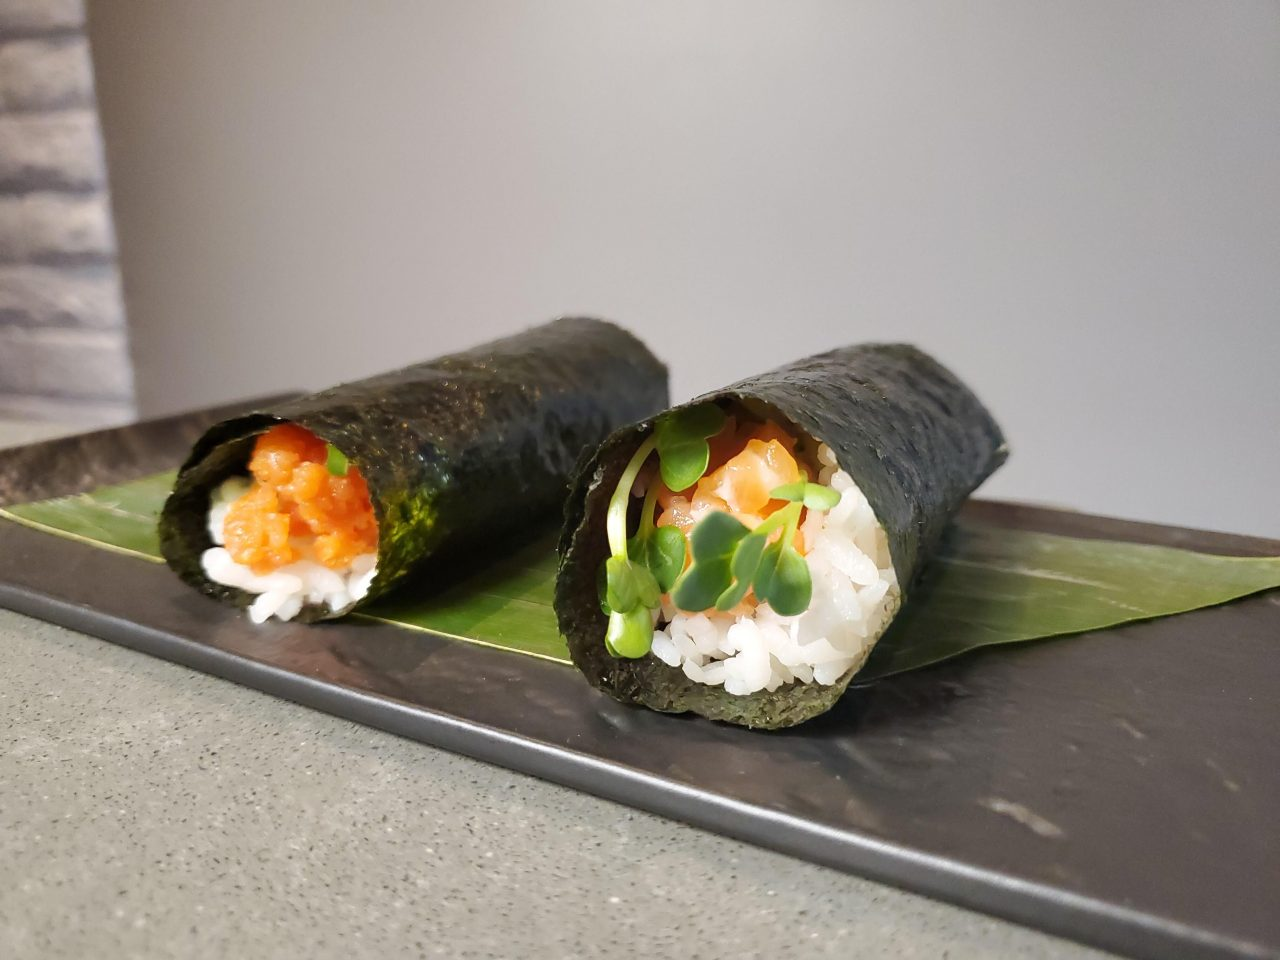

In [89]:
## view and open image
custom_image = Image.open('/content/dori-hand-rolls-2-1280x960.jpeg')
custom_image

In [101]:
## view image tensor
import torchvision
img = torchvision.io.read_image('/content/dori-hand-rolls-2-1280x960.jpeg')
img

tensor([[[143, 144, 146,  ..., 154, 156, 158],
         [145, 146, 147,  ..., 155, 156, 157],
         [146, 146, 146,  ..., 155, 155, 156],
         ...,
         [178, 181, 181,  ...,  97, 100, 103],
         [178, 180, 181,  ...,  97, 101, 104],
         [178, 180, 181,  ...,  97, 102, 106]],

        [[128, 129, 131,  ..., 150, 152, 154],
         [130, 131, 132,  ..., 151, 152, 153],
         [131, 131, 131,  ..., 151, 151, 152],
         ...,
         [170, 173, 173,  ...,  94,  97, 100],
         [170, 172, 173,  ...,  94,  98, 101],
         [170, 172, 173,  ...,  94,  99, 103]],

        [[121, 122, 124,  ..., 151, 153, 155],
         [123, 124, 125,  ..., 152, 153, 154],
         [124, 124, 124,  ..., 152, 152, 153],
         ...,
         [157, 160, 160,  ...,  89,  92,  95],
         [157, 159, 160,  ...,  89,  93,  96],
         [157, 159, 160,  ...,  89,  94,  98]]], dtype=torch.uint8)

In [103]:
## img size
print(f"Image size: {img.shape}")

Image size: torch.Size([3, 960, 1280])


Summary
* We can see there are 3 color channels.
* The image is quite large at 960x1280 which is significantly larger than the 64x64 size we trained our model on.

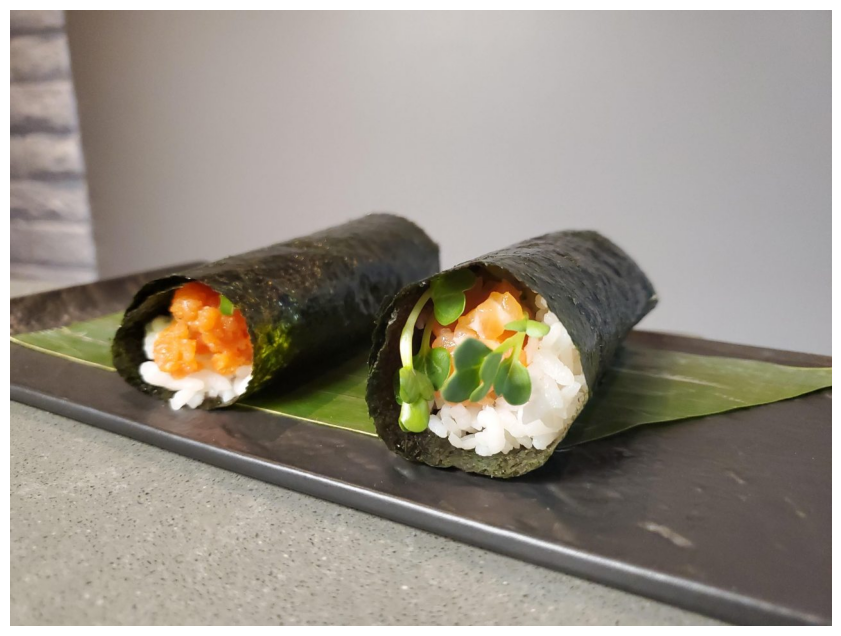

In [93]:
## plot image
plt.figure(figsize=(12,8))
plt.imshow(img.permute(1, 2, 0)) ## permute as matplotlib likes HWC (height, width, color channels)
plt.axis(False); # turn off axis

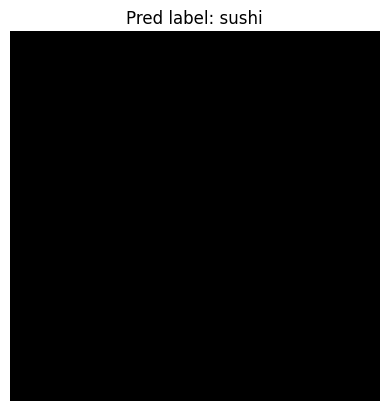

In [110]:
## seed seed for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

## make prediction
model_4.eval()
with torch.inference_mode():
  # 1. Get image pixels into float + between 0 and 1
  img = img / 255.

  # 2. Resize image to 64x64 -- size we trained model on
  resize = transforms.Resize((64, 64))
  img = resize(img)

  # 3. Turn image in single batch and pass to target device
  batch = img.unsqueeze(0).to(device)

  # 4. Predict on image
  y_pred_logits = model_4(batch)

  # 5. Convert pred logits to pred label
  pred_label = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
  #pred_label = torch.argmax(y_pred_logit, dim=1)

  # 6. Plot image and prediction
  plt.imshow(img.permute(1, 2, 0))
  plt.title(f"Pred label: {class_names[pred_label]}")
  plt.axis(False);

Summary
* The prediction is correct.
* The image is black though because we resized the image using the transform we had which was 64x64 making it smaller.